In [49]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

%matplotlib inline
colors = sns.color_palette('colorblind')
sns.set_palette(colors)
sns.set_style('whitegrid')

In [50]:
df = pd.read_json('eth_data_2018-09-19.json', orient='split').set_index('date')
df.head()

,open,high,low,close,volumefrom,volumeto
date,,,,,,
2015-08-06,0.6747,3.0,0.6747,3.00,123.93,371.79
2015-08-07,3.0000,3.0,0.1500,1.20,2119.43,1438.16
2015-08-08,1.2000,1.2,1.2000,1.20,0.00,0.00
2015-08-09,1.2000,1.2,1.2000,1.20,0.00,0.00
2015-08-10,1.2000,1.2,0.6504,0.99,9486.09,7419.73


In [11]:
ts = pd.DataFrame(df.close)
ts.head()

,close
date,
2015-08-06,3.00
2015-08-07,1.20
2015-08-08,1.20
2015-08-09,1.20
2015-08-10,0.99


In [12]:
cpts = rpt.Pelt(model='rbf').fit_predict(ts, pen=20)
print(cpts)

[655, 855, 950, 1095, 1140]


In [43]:
btc = pd.read_pickle('eth_data_2018-09-19.pkl').set_index('date')
btc.head()

,open,high,low,close,volumefrom,volumeto
date,,,,,,
2015-08-06,0.002810,0.100000,0.002810,0.009980,53584.56,577.47
2015-08-07,0.009980,0.009980,0.002304,0.003123,722558.00,2958.54
2015-08-08,0.003123,0.003631,0.002290,0.002815,737119.57,2012.14
2015-08-09,0.002815,0.002897,0.002275,0.002600,585917.04,1486.71
2015-08-10,0.002600,0.004331,0.002434,0.003938,1479695.62,4812.95


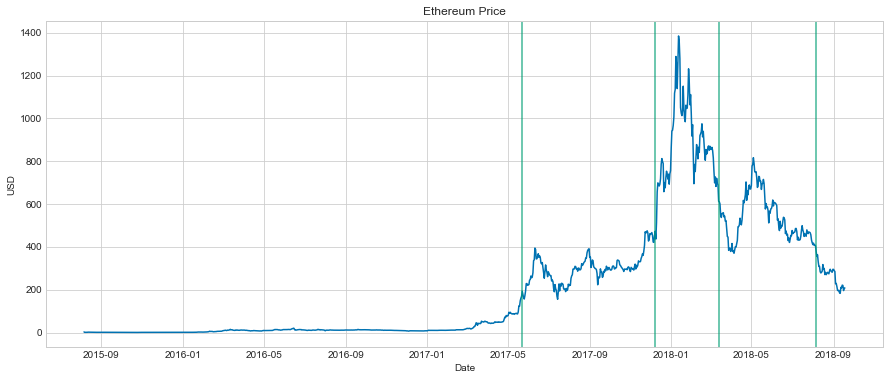

In [48]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Ethereum Price')
plt.plot(
    ts.index.values,
    ts.close,
    #label='eth close price',
    color=colors[0]
)
for cpt in cpts[:-1]:
    plt.axvline(
        x=ts.index.values[cpt],
        color=colors[1],
        alpha=.75
    )
ax1.set_ylabel('USD')
ax1.set_xlabel('Date')

#ax2 = ax1.twinx()
    
plt.show()

In [31]:
colors

[(0.0, 0.4470588235294118, 0.6980392156862745),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.9411764705882353, 0.8941176470588236, 0.25882352941176473),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]